In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## GroupBy机制


+    使用一个或多个键（形式可以是函数、数组或DataFrame列名）分割pandas对象。
+   计算分组的概述统计，比如数量、平均值或标准差，或是用户定义的函数。
+  应用组内转换或其他运算，如规格化、线性回归、排名或选取子集等。
+ 计算透视表或交叉表。
+ 执行分位数分析以及其它统计分组分析。


### GroupBy的工作原理
1. 拆分(split)：根据传入的分组方式进行分组
2. 应用(apply)：对每个分组运用对应的函数
3. 合并(combine)：合并数据集

![](https://camo.githubusercontent.com/8e5549c8c55780a51555d0c193f8568e73796143/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d653563363731653039656366393462652e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)

分组键可以有很多中形式， 而且类型可以不相同
+ 列表或者数组，其长度与待分组的轴一样
+ DataFrame的每个列名值
+ 字典或者Series，给出待分组轴上的值与分组名之间对应关系
+ 函数，用于处理轴索引或者索引中的各个标签

### 分组操作

In [3]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                       'key2' : ['one', 'two', 'one', 'two', 'one'],
                       'data1' : np.random.randn(5),
                       'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.341073,2.355754
1,a,two,-1.385922,0.466002
2,b,one,-2.474644,1.456787
3,b,two,0.654396,1.274367
4,a,one,-1.891275,1.906919


示例1：按key1进行分组，并计算data1列的平均值

In [8]:
grouped = df['data1'].groupby(df['key1'])
grouped

对`DataFrame`进行分组，返回一个GroupBy对象

In [9]:
grouped.mean()

key1
a   -0.645375
b   -0.910124
Name: data1, dtype: float64

示例2：根据key1，key2进行分组，并计算data1的平均值

In [10]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.275101
      two    -1.385922
b     one    -2.474644
      two     0.654396
Name: data1, dtype: float64

In [11]:
means.unstack()

key2,one,two
key1,,
a,-0.275101,-1.385922
b,-2.474644,0.654396


示例3：根据适当长度的数组进行分组


In [15]:
# df['data1'].size  5
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005   -1.385922
            2006   -2.474644
Ohio        2005    0.997735
            2006   -1.891275
Name: data1, dtype: float64

In [26]:
# 上面代码可以看出如下：
df2 = pd.concat([df['data1'],
                 pd.Series(states, name='states'),
                 pd.Series(years, name='years')],
                axis=1)
df2['data1'].groupby([df2['states'], df2['years']]).mean()

states      years
California  2005    -1.385922
            2006    -2.474644
Ohio        2005     0.997735
            2006    -1.891275
Name: data1, dtype: float64

示例4：根据df的key1进行分组，并计算平均值

In [27]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.645375,1.576225
b,-0.910124,1.365577


**注意：**不相关的数据(非数组型数列)会被过滤掉。（如，上面的key2）

示例5：根据df的key1, key2进行分组，并计算平均值

In [29]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.275101  2.131336
     two  -1.385922  0.466002
b    one  -2.474644  1.456787
     two   0.654396  1.274367

示例5：根据df的key1，key2进行分组，并计算每个小组里面数组的个数

In [31]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### 对分组进行迭代

GroupBy对象支持迭代，可以产生一组二元元组
GroupBy--->(name1, group1),(name2, group2)....

示例1：根据df的key1进行分组，并遍历分组产生的GroupBy对象

In [32]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  1.341073  2.355754
1    a  two -1.385922  0.466002
4    a  one -1.891275  1.906919
b
  key1 key2     data1     data2
2    b  one -2.474644  1.456787
3    b  two  0.654396  1.274367


示例1：根据df的key1,key2进行分组，并遍历分组产生的GroupBy对象.  
（这里有点特殊，因为根据多个键值进行分组，返回的name是一个多元元组）


In [35]:
# for name, group in df.groupby(['key1', 'key2']):
for (key1, key2), group in df.groupby(['key1', 'key2']):
    print(key1, key2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one  1.341073  2.355754
4    a  one -1.891275  1.906919
a two
  key1 key2     data1     data2
1    a  two -1.385922  0.466002
b one
  key1 key2     data1     data2
2    b  one -2.474644  1.456787
b two
  key1 key2     data1     data2
3    b  two  0.654396  1.274367


 示例3：根据df的key1进行分组，并将数据片段变为一个字典

In [36]:
pieces = dict(list(df.groupby('key1')))
pieces

{'a':   key1 key2     data1     data2
 0    a  one  1.341073  2.355754
 1    a  two -1.385922  0.466002
 4    a  one -1.891275  1.906919, 'b':   key1 key2     data1     data2
 2    b  one -2.474644  1.456787
 3    b  two  0.654396  1.274367}

In [37]:
pieces['b']

,key1,key2,data1,data2
2,b,one,-2.474644,1.456787
3,b,two,0.654396,1.274367


示例4：根据df的dtype进行分类(**注意：**可以通过axis=1分类)


In [39]:
df.dtypes


key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [45]:
grouped = df.groupby(df.dtypes, axis=1)
grouped.size()

float64    2
object     2
dtype: int64

In [46]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0  1.341073  2.355754
1 -1.385922  0.466002
2 -2.474644  1.456787
3  0.654396  1.274367
4 -1.891275  1.906919
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


### 选取一列或者列的子集

示例1：根据df的key1进行分组，并选取其中的某一列

In [52]:
%%timeit
df.groupby('key1')['data1']

154 µs ± 3.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [49]:
df.groupby('key1')[['data2']]

上面两行代码相当于

In [57]:
df['data1'].groupby(df['key1'])

In [60]:
df[['data2']].groupby(df['key1'])

示例2：根据df的key1，key2进行分组，选取其中的data2进行求平均，返回一个DataFrame

In [62]:
df.groupby(['key1', 'key2'])[['data1']].mean()

data1
key1 key2          
a    one  -0.275101
     two  -1.385922
b    one  -2.474644
     two   0.654396

示例3：根据df的key1，key2进行分组，选取其中的data2进行求平均，返回一个Series

In [63]:
df.groupby(['key1','key2'])['data1'].mean()

key1  key2
a     one    -0.275101
      two    -1.385922
b     one    -2.474644
      two     0.654396
Name: data1, dtype: float64

### 传入映射字典进行分组

In [64]:
people = pd.DataFrame(np.random.randn(5, 5),
                          columns=['a', 'b', 'c', 'd', 'e'],
                          index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,0.522318,-0.340390,-0.659717,1.107929,0.744146
Steve,0.660020,1.161863,-1.165410,0.773331,-0.517003
Wes,-0.673866,NaN,NaN,-1.098838,1.279254
Jim,0.729824,1.138708,-0.597597,1.027640,-0.219603
Travis,1.474624,-0.685122,1.403698,1.502232,1.371654


示例1：假设已知列的分组关系，根据分组计算列的和。  
(**Note：**如果存在未使用的键，程序不会报错)

In [67]:
mapping = {'a':'red','b':'red','c':'blue','d':'blue','e':'red','f':'orange'}
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,0.448212,0.926074
Steve,-0.392080,1.304880
Wes,-1.098838,0.605388
Jim,0.430043,1.648930
Travis,2.905929,2.161155


示例2：传入Series作为映射，并计算每组的数量

In [68]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [69]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### 通过函数进行分组

示例1：根据索引的长度进行分组

In [70]:
people.groupby(len).sum() 

,a,b,c,d,e
3,0.578276,0.798319,-1.257314,1.036730,1.803797
5,0.660020,1.161863,-1.165410,0.773331,-0.517003
6,1.474624,-0.685122,1.403698,1.502232,1.371654


示例2：根据索引最后一个字母进行分组

In [73]:
people.groupby(lambda x:x[-1]).sum()

,a,b,c,d,e
e,1.182338,0.821473,-1.825127,1.881259,0.227144
m,0.729824,1.138708,-0.597597,1.027640,-0.219603
s,0.800758,-0.685122,1.403698,0.403393,2.650908


### 将函数、数组、列表等混合使用

示例1：根据people索引的长度和key_list进行分组

In [75]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).sum()

a         b         c         d         e
3 one -0.151548 -0.340390 -0.659717  0.009090  2.023400
  two  0.729824  1.138708 -0.597597  1.027640 -0.219603
5 one  0.660020  1.161863 -1.165410  0.773331 -0.517003
6 two  1.474624 -0.685122  1.403698  1.502232  1.371654

### 根据索引级别进行分组

In [77]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                     [1, 3, 5, 1, 3]],
                                     names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4,5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.640946  0.938213  0.332981 -2.128284  0.074242
1     -1.245719 -1.602921 -0.475766  0.032530 -0.647863
2      1.544264  0.097320 -0.237489 -0.094617 -2.402969
3     -0.917560 -1.276469 -0.481658 -0.786999 -0.801427

In [79]:
hier_df.groupby(level=0, axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## 数据聚合

**聚合指的是任何能够从数组产生标量值的数据转换过程。**之前的例子已经用过一些，比如mean、count、min以及sum等。你可能想知道在GroupBy对象上调用mean()时究竟发生了什么。许多常见的聚合运算（如表10-1所示）都有进行优化。然而，除了这些方法，你还可以使用其它的。

![](https://camo.githubusercontent.com/ceb83fe40f3025fa5a8d17aa6b50e74407b6d95a/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d626138646535323465303862316236662e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)

### 普通聚合操作

In [80]:
df

,key1,key2,data1,data2
0,a,one,1.341073,2.355754
1,a,two,-1.385922,0.466002
2,b,one,-2.474644,1.456787
3,b,two,0.654396,1.274367
4,a,one,-1.891275,1.906919


示例1：根据df的key1进行分组，并计算data1的上四分位数

In [82]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.75)

key1
a   -0.022425
b   -0.127864
Name: data1, dtype: float64

**Note:**如果想要自己定义聚合函数可以通过`GroupBy.aggregate(func)`实现

示例2：根据df的key1进行分组，并计算分组数据的极差

In [85]:
def func(arr):
    """
    由于分组的聚合操作是将每个小组的每一列当作整体进行聚合操作，
    所以这里用arr接收
    """
    return arr.max() - arr.min()
df.groupby('key1').agg(func)

,data1,data2
key1,,
a,3.232349,1.889752
b,3.129040,0.182420


示例3：根据df的key1进行分组，并对每组进行描述(describe)

In [86]:
df.groupby('key1').describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.645375  1.738772 -1.891275 -1.638599 -1.385922 -0.022425   
b      2.0 -0.910124  2.212565 -2.474644 -1.692384 -0.910124 -0.127864   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.341073   3.0  1.576225  0.987324  0.466002  1.186461  1.906919   
b     0.654396   2.0  1.365577  0.128990  1.274367  1.319972  1.365577   

                          
           75%       max  
key1                      
a     2.131336  2.355754  
b     1.411182  1.456787

***Note:***如果能用优化过的函数(mean,sum等)就用优化过的函数，因为自定义函数会消耗很多的内存

### 面向列的多函数应用

In [2]:
tips = pd.read_csv('examples/tips.csv')
# 添加小费百分比
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


你已经看到，对Series或DataFrame列的聚合运算其实就是使用aggregate（使用自定义函数）或调用诸如mean、std之类的方法。然而，你可能希望对不同的列使用不同的聚合函数，或一次应用多个函数。

先对数据进行分组, 根据(day, smoker)对tips进行分组

In [90]:
grouped = tips.groupby(['day', 'smoker'])

示例1：根据分组，采集其中的tip_pct，求平均值

In [94]:
grouped_pct = grouped[['tip_pct']]
grouped_pct.agg('mean')

tip_pct
day  smoker          
Fri  No      0.151650
     Yes     0.174783
Sat  No      0.158048
     Yes     0.147906
Sun  No      0.160113
     Yes     0.187250
Thur No      0.160298
     Yes     0.163863

示例2：根据分组，采集其中的tip_pct，求平均值, 标准差, 极差(func)

传入一组函数或函数名，得到的DataFrame的列就会以相应的函数命名：

In [98]:
grouped_pct.agg(['mean', 'std', func])

tip_pct                    
                 mean       std      func
day  smoker                              
Fri  No      0.151650  0.028123  0.067349
     Yes     0.174783  0.051293  0.159925
Sat  No      0.158048  0.039767  0.235193
     Yes     0.147906  0.061375  0.290095
Sun  No      0.160113  0.042347  0.193226
     Yes     0.187250  0.154134  0.644685
Thur No      0.160298  0.038774  0.193350
     Yes     0.163863  0.039389  0.151240

示例3：根据分组，采集其中的tip_pct，求平均值, 标准差, 极差(func)。并为此起别名  
**Note:**可以通过传入列表元组起别名[(name, func), (name,func)...]

In [105]:
grouped_pct.agg([('foo','mean'), ('bar',np.std), ('range',func)])

tip_pct                    
                  foo       bar     range
day  smoker                              
Fri  No      0.151650  0.028123  0.067349
     Yes     0.174783  0.051293  0.159925
Sat  No      0.158048  0.039767  0.235193
     Yes     0.147906  0.061375  0.290095
Sun  No      0.160113  0.042347  0.193226
     Yes     0.187250  0.154134  0.644685
Thur No      0.160298  0.038774  0.193350
     Yes     0.163863  0.039389  0.151240

示例4：根据分组后(grouped)的对象采集tip_pct、total_bill数据，对计算每列数据的统计信息  
（相当于，对每一列进行聚合，然后concat起来）

In [107]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

示例5：根据分组后(grouped)的对象采集tip_pct、total_bill数据，对计算每列数据的统计信息。并起别名  

In [108]:
ftuples = [('平均值', 'mean'), ('方差', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct           total_bill            
                  平均值        方差        平均值          方差
day  smoker                                           
Fri  No      0.151650  0.000791  18.420000   25.596333
     Yes     0.174783  0.002631  16.813333   82.562438
Sat  No      0.158048  0.001581  19.661778   79.908965
     Yes     0.147906  0.003767  21.276667  101.387535
Sun  No      0.160113  0.001793  20.506667   66.099980
     Yes     0.187250  0.023757  24.120000  109.046044
Thur No      0.160298  0.001503  17.113111   59.625081
     Yes     0.163863  0.001551  19.190588   69.808518

示例5：根据分组后(grouped)的对象采集tip_pct、total_bill数据，计算tip_pct的个数(count)，total_bill的平均值和方差(mean,var)。并起别名.  
**Note:**可以通过字典完成


In [109]:
map_dict = {
    'tip_pct':'count',
    'total_bill':[('平均值','mean'), ('方差', np.var)]
}
grouped['tip_pct', 'total_bill'].agg(map_dict)

tip_pct total_bill            
              count        平均值          方差
day  smoker                               
Fri  No           4  18.420000   25.596333
     Yes         15  16.813333   82.562438
Sat  No          45  19.661778   79.908965
     Yes         42  21.276667  101.387535
Sun  No          57  20.506667   66.099980
     Yes         19  24.120000  109.046044
Thur No          45  17.113111   59.625081
     Yes         17  19.190588   69.808518

### 取消索引的聚合模式

示例1：对tips进行分组并取消分组的索引(即，分组完成后，保留分组的数据，而不是把分组的依据当成索引)，求分组后的平均值。  
**Note:**as_index=Fasle

In [7]:
grouped = tips.groupby(['day', 'smoker'], as_index=False).mean()
grouped

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


上面操作相当于

In [11]:
grouped2 =tips.groupby(['day', 'smoker']).mean()
grouped2

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [12]:
grouped2.reset_index()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


## filter:过滤操作

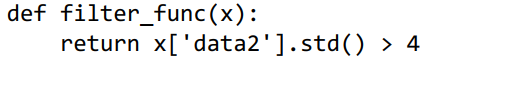

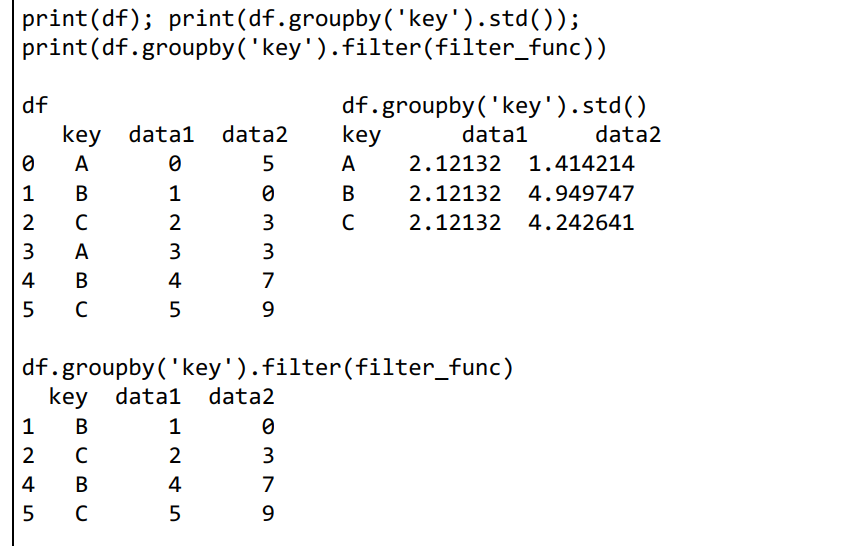

示例1：根据smoker，day对tips进行分组，并选取其中中的count小于16的的所有组的数据

In [96]:
tips.groupby(['smoker', 'day']).count()

total_bill  tip  time  size  tip_pct
smoker day                                       
No     Fri            4    4     4     4        4
       Sat           45   45    45    45       45
       Sun           57   57    57    57       57
       Thur          45   45    45    45       45
Yes    Fri           15   15    15    15       15
       Sat           42   42    42    42       42
       Sun           19   19    19    19       19
       Thur          17   17    17    17       17

In [99]:
def filter_func(x):
    return x['size'].count() < 16
tips.groupby(['smoker', 'day']).filter(filter_func)


,total_bill,tip,smoker,day,time,size,tip_pct
90,28.97,3.00,Yes,Fri,Dinner,2,0.103555
91,22.49,3.50,No,Fri,Dinner,2,0.155625
92,5.75,1.00,Yes,Fri,Dinner,2,0.173913
93,16.32,4.30,Yes,Fri,Dinner,2,0.263480
94,22.75,3.25,No,Fri,Dinner,2,0.142857
95,40.17,4.73,Yes,Fri,Dinner,4,0.117750
96,27.28,4.00,Yes,Fri,Dinner,2,0.146628
97,12.03,1.50,Yes,Fri,Dinner,2,0.124688
98,21.01,3.00,Yes,Fri,Dinner,2,0.142789
99,12.46,1.50,No,Fri,Dinner,2,0.120385


如上述例子：分组后有些组的count会小于16，filter可以可以每一组进行判断，如果满足条件的组会被挑选出来
## transform:转换
Aggregate操作返回的是对组内全变量缩减的过程。
而转换则会返回一个新的**全量数据**  
示例：根据smoker对tips进行分组，对每个小组的size求平均误差

In [142]:
df = pd.DataFrame({'key':['a','b','a','a','b'],'data':[1,2,3,4,5], 'data2':[100,200,300,400,500]})

In [143]:
display(df, df.groupby('key').mean(),
        df.groupby('key').transform(lambda x: x-x.mean()))

,key,data,data2
0,a,1,100
1,b,2,200
2,a,3,300
3,a,4,400
4,b,5,500


,data,data2
key,,
a,2.666667,266.666667
b,3.500000,350.000000


,data,data2
0,-1.666667,-166.666667
1,-1.500000,-150.000000
2,0.333333,33.333333
3,1.333333,133.333333
4,1.500000,150.000000


## apply:一般性的‘拆分-应用-合并’

apply会将待处理的对象拆分成多个片段，然后对各片段调用传入的函数，最后尝试将各片段组合到一起。

![](https://camo.githubusercontent.com/75efe2c5f4cd3b5580b7561558bfb575f7f3092c/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d376538626232313766353939623461652e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)

示例1：根据分组选出最高5个tip_pct。

In [46]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [49]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

**Note:**apply传入的函数对tips分组的DataFrame的各个片段进行调用，然后用pd.concat组装到一起，并以分组名称进行标记

示例2：根据分组选出total_bill中最高的7个  
（即，往top里面传参数）  
**Note:**可以在apply后面添加参数


In [53]:
tips.groupby('smoker').apply(top, n=7, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker                                                            
No     238       35.83   4.67     No   Sat  Dinner     3  0.130338
       112       38.07   4.00     No   Sun  Dinner     3  0.105070
       23        39.42   7.58     No   Sat  Dinner     4  0.192288
       142       41.19   5.00     No  Thur   Lunch     5  0.121389
       156       48.17   5.00     No   Sun  Dinner     6  0.103799
       59        48.27   6.73     No   Sat  Dinner     4  0.139424
       212       48.33   9.00     No   Sat  Dinner     4  0.186220
Yes    207       38.73   3.00    Yes   Sat  Dinner     4  0.077459
       95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       184       40.55   3.00    Yes   Sun  Dinner     2  0.073983
       197       43.11   5.00    Yes  Thur   Lunch     4  0.115982
       102       44.30   2.50    Yes   Sat  Dinner     3  0.056433
       182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       170       50.81  10.00    Yes   Sat  Dinner     3  0.196812

apply可以传入自定义函数，只要返回一个**pandas对象或者标量**就可以

示例3：根据smoker对tips进行分组，去分组中的tip_pct，并描述(describe)

In [56]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [57]:
result.unstack()

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

上面代码相当于：

In [59]:
tips.groupby('smoker').apply(lambda x:x.describe())

total_bill         tip        size     tip_pct
smoker                                                      
No     count  151.000000  151.000000  151.000000  151.000000
       mean    19.188278    2.991854    2.668874    0.159328
       std      8.255582    1.377190    1.017984    0.039910
       min      7.250000    1.000000    1.000000    0.056797
       25%     13.325000    2.000000    2.000000    0.136906
       50%     17.590000    2.740000    2.000000    0.155625
       75%     22.755000    3.505000    3.000000    0.185014
       max     48.330000    9.000000    6.000000    0.291990
Yes    count   93.000000   93.000000   93.000000   93.000000
       mean    20.756344    3.008710    2.408602    0.163196
       std      9.832154    1.401468    0.810751    0.085119
       min      3.070000    1.000000    1.000000    0.035638
       25%     13.420000    2.000000    2.000000    0.106771
       50%     17.920000    3.000000    2.000000    0.153846
       75%     26.860000    3.680000    3.000000    0.195059
       max     50.810000   10.000000    5.000000    0.710345

示例4：根据smoker对tips进行分组，并添加一列(tip_multi_size)

In [101]:
def apply_func(x):
    x['tip_multi_size'] = x['tip'] * x['size']
    return x
tips.groupby('smoker').apply(apply_func).head()

,total_bill,tip,smoker,day,time,size,tip_pct,tip_multi_size
0,16.99,1.01,No,Sun,Dinner,2,0.059447,2.02
1,10.34,1.66,No,Sun,Dinner,3,0.160542,4.98
2,21.01,3.50,No,Sun,Dinner,3,0.166587,10.50
3,23.68,3.31,No,Sun,Dinner,2,0.139780,6.62
4,24.59,3.61,No,Sun,Dinner,4,0.146808,14.44


### 禁止分组键

由上面例子可以看出：通过分组apply后分组的依据会当作索引。可以通过传入group_keys,修改操作。  

示例1：根据smoker对tips进行分组，并把分组的的依据还原。  


In [62]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [63]:
tips.groupby('smoker', as_index=False).apply(top)

total_bill   tip smoker   day    time  size   tip_pct
0 88        24.71  5.85     No  Thur   Lunch     2  0.236746
  185       20.69  5.00     No   Sun  Dinner     5  0.241663
  51        10.29  2.60     No   Sun  Dinner     2  0.252672
  149        7.51  2.00     No  Thur   Lunch     2  0.266312
  232       11.61  3.39     No   Sat  Dinner     2  0.291990
1 109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
  183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
  67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
  178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
  172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

对比一下group_keys和as_index可以看出，as_index只是把分组依据还原回去后，用默认索引代替。  
而group_keys一旦设定就不会用层级索引

### 分位数和桶分析

In [111]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                       'data2': np.random.randn(1000)})

In [118]:
quartiles = pd.cut(frame.data1, 4)
quartiles[:8]

0     (0.332, 1.828]
1    (-1.164, 0.332]
2     (0.332, 1.828]
3    (-1.164, 0.332]
4     (0.332, 1.828]
5    (-1.164, 0.332]
6    (-1.164, 0.332]
7     (1.828, 3.324]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.667, -1.164] < (-1.164, 0.332] < (0.332, 1.828] < (1.828, 3.324]]

示例1：根据区间划分对frame.data2进行分类

In [121]:
grouped = frame.data2.groupby(quartiles)
len(list(grouped))

4

示例2：根据区间划分对frame.data2进行分类。对获取每个小组的统计数据(count, max, mean, max)

In [127]:
def get_stats(group):
    return {
        'min':group.min(),
        'max':group.max(),
        'count':group.count(),
        'mean':group.mean()
    }
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.667, -1.164]",106.0,3.210119,0.039615,-2.360351
"(-1.164, 0.332]",523.0,2.841288,0.009685,-2.591931
"(0.332, 1.828]",336.0,3.141762,-0.055392,-3.204247
"(1.828, 3.324]",35.0,1.244815,-0.102135,-1.828422


In [130]:
def get_stats2(group):
    group['min'] = group.min()
    group['max'] = group.max()
    return group
# 两种方法不一样
# grouped.apply(get_stats2).unstack()

In [141]:
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,3.210119,0.050064,-2.360351
1,100.0,2.841288,0.027774,-2.586979
2,100.0,2.482167,-0.028772,-2.016180
3,100.0,2.721582,-0.004746,-1.954934
4,100.0,2.433149,0.093108,-2.591931
5,100.0,2.062076,-0.068910,-1.997119
6,100.0,2.216600,0.061283,-2.645708
7,100.0,1.914626,0.045205,-3.204247
8,100.0,2.312653,-0.132874,-2.353333


### 示例一：用特定于分组的值填充缺失值

在数据处理难免会遇到缺失值，一般可以通过`fillna(value)`去填充缺失值。但如果我们想按分组填充缺失值的话。可以通过apply进行不同组的填充.


In [144]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1    1.020236
2         NaN
3   -0.844332
4         NaN
5    0.172252
dtype: float64

示例1：普通填充

In [146]:
s.fillna(s.mean())

0    0.116052
1    1.020236
2    0.116052
3   -0.844332
4    0.116052
5    0.172252
dtype: float64

示例2：根据分组填充缺失值

In [148]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
              'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio          0.422509
New York     -0.000253
Vermont            NaN
Florida       0.748856
Oregon        0.303337
Nevada             NaN
California    1.161443
Idaho              NaN
dtype: float64

In [150]:
data.groupby(group_key).mean()

East    0.390371
West    0.732390
dtype: float64

In [152]:
data.groupby(group_key).apply(lambda g:g.fillna(g.mean()))

Ohio          0.422509
New York     -0.000253
Vermont       0.390371
Florida       0.748856
Oregon        0.303337
Nevada        0.732390
California    1.161443
Idaho         0.732390
dtype: float64

示例3：根据分组名称进行不同分组填充缺失值

In [153]:
fill_values = {
    'East':111,
    'West':222
}
def fill_func(g):
    """
    由于分组后，每个小组都有自己的名称(可以通过g.name获得)
    我们可以根据名称填充不同的值
    """
    return g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio            0.422509
New York       -0.000253
Vermont       111.000000
Florida         0.748856
Oregon          0.303337
Nevada        222.000000
California      1.161443
Idaho         222.000000
dtype: float64

### 示例二：随机采样与排列

先创建一副扑克牌

In [160]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [11, 12, 13]) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'Q', 'K']
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names)
deck = pd.Series(card_val, index=cards)
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     11
QH     12
KH     13
dtype: int64

示例1：从扑克牌中随机抽取n张牌

In [162]:
def draw(deck, n=5):
    """
    从扑克牌deck中抽取n张牌
    """
    return deck.sample(n)

draw(deck, n=6)

9D     9
5D     5
AC     1
QH    12
7S     7
4C     4
dtype: int64

示例2：从每种花色随机抽取2张

In [166]:
def get_same_suit(card):
    """
    由于花色的索引为Series的索引字符串-1位置
    所以可以通过访问字符串-1判别花色
    """
    return card[-1]
deck.groupby(get_same_suit).apply(draw, n=2)

C  6C     6
   QC    12
D  AD     1
   JD    11
H  AH     1
   9H     9
S  4S     4
   JS    11
dtype: int64

也可以这样写

In [167]:
deck.groupby(get_same_suit, group_keys=False).apply(draw, n=2)

9C    9
6C    6
AD    1
5D    5
4H    4
9H    9
AS    1
7S    7
dtype: int64

### 示例3：分组加权平均数和相关系数

示例1：加权平均值

In [168]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                    'b', 'b', 'b', 'b'],
                       'data': np.random.randn(8),
                       'weights': np.random.rand(8)})
df

,category,data,weights
0,a,0.753510,0.838128
1,a,-1.073305,0.605984
2,a,-0.948689,0.870206
3,a,1.278804,0.886689
4,b,0.035030,0.276160
5,b,0.874235,0.789520
6,b,-0.369767,0.730400
7,b,-1.270240,0.909210


In [171]:
def get_wavg(g):
    """
    定义加权平均函数
    """
    return np.average(g.data, weights=g.weights)
df.groupby('category').apply(get_wavg)

category
a    0.090434
b   -0.268028
dtype: float64

示例2：计算股票日均收益率与标普500之间的年度相关系数

获取股票信息

In [173]:
close_px = pd.read_csv('examples/stock_px_2.csv', parse_dates=True,
                           index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


In [179]:
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [200]:
# 创建函数，计算每支股票于标普500的相关系数
spx_corr = lambda x: x.corrwith(x['SPX'])

In [201]:
# 获取股票的日均收益率，由于第一行没有对比数据所以为na，这里用dropna删除
rets = close_px.pct_change().dropna()

In [202]:
# 获取所有的年份
get_year = lambda x:x.year

In [204]:
# 用于没有传入键，默认以索引为键-->get_year(index)
by_year = rets.groupby(get_year)

In [210]:
# def _(g):
#     print(type(g))
#     return g.corrwith(g['SPX'])
# by_year.apply(_)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


示例3：计算Apple于Micosoft的年相关系数

In [217]:
# def _(g):
#     print(type(g))
#     return g['AAPL'].corr(g['MSFT'])
# by_year.apply()
by_year.apply(lambda g:g['AAPL'].corr(g['MSFT']))


2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

**Note:**corrwith用于两个DataFrame之间的比较，corr用于两个Series之间的比较

In [222]:
df1 = pd.DataFrame([1,2,3],index=['2011','2012','2013'], columns=['c1'])
df2 = pd.DataFrame([2,5,3],index=['2011','2012','2013'], columns=['c2'])
df1.corrwith(df2)
df1['c1'].corr(df2['c2'])

0.32732683535398854

### 示例4：组级别的线性回归

顺着上一个例子继续，你可以用groupby执行更为复杂的分组统计分析，只要函数返回的是pandas对象或标量值即可。例如，我可以定义下面这个regress函数（利用statsmodels计量经济学库）对各数据块执行普通最小二乘法（Ordinary Least Squares，OLS）回归：

In [228]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    y = data[yvar]
    x = data[xvars]
    x['intercept'] = 1
    result = sm.OLS(y, x).fit()
    return result.params

by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


## 透视表(pivot table)和交叉表
![](https://camo.githubusercontent.com/63b3d687e5ff4cc334b0b72ce681c58c89482ff3/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d633965303138343463343830336134322e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)
>数据透视表（pivot table） 是一种类似的操作方法， 常见于 Excel 与
类似的表格应用中。 数据透视表将每一列数据作为输入， 输出将数据不
断细分成多个维度累计信息的二维数据表。 人们有时容易弄混数据透视
表与 GroupBy， 但我觉得数据透视表更像是一种多维的 GroupBy 累计
操作。 

### 演示数据透视表

In [232]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 手工制作数据透视表

示例1：根据sex对titanic进行分组选取其中的survived，对其求平均值

In [235]:
titanic.groupby('sex')[['survived']].mean()


,survived
sex,
female,0.742038
male,0.188908


示例2：将船舱等级（ 'class'） 与性别（ 'sex'） 分组， 然后选
择生还状态（ 'survived'） 列， 应用均值（ 'mean'） 累计函数， 再将
各组结果组合， 最后通过行索引转列索引操作将最里层的行索引转换成
列索引， 形成二维数组。

In [243]:
titanic.groupby(['class','sex'])['survived'].mean().unstack(level=0)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 数据透视表语法
用 DataFrame 的 pivot_table 实现的效果等同于上一节的管道命令的
代码：

`df.pivot_table(value=[想要观察的数据], index=[分组名，并且把分组放在索引中], columns=[分组名, 并且把分组放在列索引中],aggfunc='要聚合的函数'，fill_value='填充na值', margins='boolean添加边缘密度函数', margins_name='ALL 对边缘密度函数起别名')`

In [242]:
titanic.pivot_table(values='survived', index=['sex'], columns=['class'])

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 多级数据透视表

与 GroupBy 类似， 数据透视表中的分组也可以通过各种参数指定
多个等级。 例如， 我们可能想把年龄（'age'） 也加进去作为第三
个维度， 这就可以通过 pd.cut 函数将年龄进行分段：

In [248]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

用 pd.qcut 将船票价
格按照计数项等分为两份， 加入数据透视表看看：

In [254]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'], fill_value=0)

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]                 0  1.000000  0.714286          0.909091   
       (18, 80]                0  0.880000  0.444444          0.972973   
male   (0, 18]                 0  0.000000  0.260870          0.800000   
       (18, 80]                0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

### 其他数据透视表选项

aggfunc 参数用于设置累计函数类型， 默认值是均值（mean） 。
与 GroupBy 的用法一样， 累计函数可以用一些常见的字符串
（'sum'、 'mean'、 'count'、 'min'、 'max' 等） 表示， 也可以
用标准的累计函数（np.sum()、 min()、 sum() 等） 表示。 另外，还可以通过字典为不同的列指定不同的累计函数：

#### aggfunc

In [258]:
titanic.pivot_table(['survived', 'fare'], index='sex', columns='class',
                   aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

上面相当于：

In [260]:
# 由于aggfunc里面传入参数，pandas可以自动识别出要聚合的values

titanic.pivot_table(index='sex', columns='class',
                   aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

#### margins:边缘密度函数

In [262]:
titanic.pivot_table(values='survived',index='sex',
                   columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


#### margins_name:起别名

In [263]:
titanic.pivot_table(values='survived',index='sex',
                   columns='class', margins=True,
                   margins_name='margins')

class,First,Second,Third,margins
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
margins,0.629630,0.472826,0.242363,0.383838


### 示例

In [231]:
tips = pd.read_csv('examples/tips.csv')
# 添加小费百分比
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


示例1：根据day，smoker对tips进行分组，并把分组依据放在index

In [265]:
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

示例2：根据time，day，smoker对tips进行分组，并且把time，day放在index，
把smoker放在columns.index，观察tip_pct, size的平均值

In [285]:
tips.pivot_table(['tip_pct', 'size'], index=['time','day'], columns=['smoker'])

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [300]:
tips.pivot_table(['tip_pct', 'size'],aggfunc={'size':'sum', 'tip_pct':'mean'},
                 index=['time', 'day'], columns=['smoker'],
                 margins=True)

size               tip_pct                    
smoker          No    Yes  All        No       Yes       All
time   day                                                  
Dinner Fri     6.0   20.0   26  0.139622  0.165347  0.158916
       Sat   115.0  104.0  219  0.158048  0.147906  0.153152
       Sun   167.0   49.0  216  0.160113  0.187250  0.166897
       Thur    2.0    NaN    2  0.159744       NaN  0.159744
Lunch  Fri     3.0   11.0   14  0.187735  0.188937  0.188765
       Thur  110.0   40.0  150  0.160311  0.163863  0.161301
All          403.0  224.0  627  0.159328  0.163196  0.160803


## 交叉表(cross-tabulation)
用于计算分组频率的特殊透视表

In [307]:
data = pd.read_csv('examples/crosstab.csv')
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


示例1：根据国籍和用手习惯对这段数据进行统计汇总。

In [309]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


crosstab可以是几个Series连接在一起

In [311]:
pd.crosstab(index=[tips.time, tips.day], columns=tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244